# Probability Distributions By Examples
[Edward Lu](https://github.com/edwardlu71/notebooks)

### concepts

- CDF: cumulative distribution function. $CDF(x) = P(X \leq x)$
- PMF: probability mass function, it is a function that gives the **probability** that a discrete random variable is exactly equal to some value, and they sum up to 1. $ PDF(x_i) = P(X=x_i) $
- PDF: probability density function, it is **NOT probability**. It is the derivative of CDF(x) on continuous random variable x. Its integral on a interval of x gives the probability of that interval

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from IPython.core.display import Image

import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(10, 5)})

from scipy.stats import uniform, norm, binom, bernoulli, poisson, beta, gamma, boltzmann, expon
import numpy as np
from sympy import init_printing, symbols, simplify, expand, Matrix
init_printing()

## Normal Distribution

$$ \begin{align}
f(x|\mu,\sigma^2) = \frac{1}{\sqrt {2\pi\sigma^2 }} \large e^{ - {\frac{(x-\mu)^2}{2\sigma^2}}}
\end{align} $$

where $\mu$ is the mean, and $\sigma$ is the standard deviation

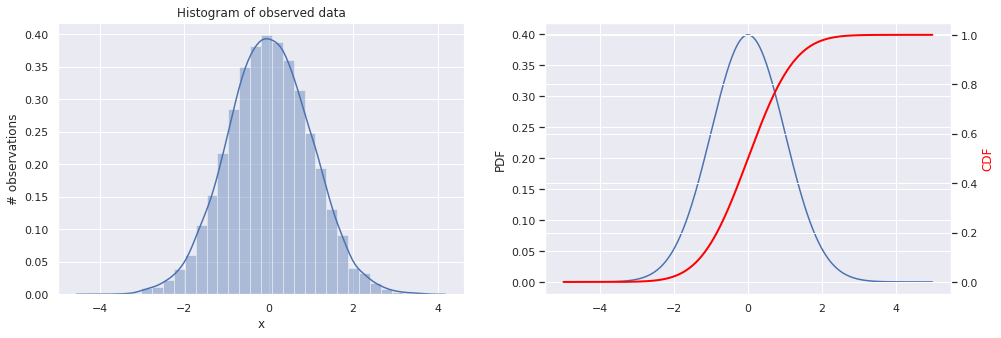

In [2]:
# loc: mean

mu = 0
sigma = 1
data = norm.rvs(size=10000, loc=mu, scale=sigma)

fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(16, 5))
sns.distplot(data, kde=True, bins=30, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');

x = np.linspace(-(5+mu)*sigma, (5+mu)*sigma, 1000)
y_pdf = norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = norm.cdf(x, mu, sigma) # the normal cdf

ax2.plot(x, y_pdf)
ax2.set_ylabel('PDF')
ax3 = ax2.twinx()
ax3.plot(x, y_cdf, 'r-', color="red", label='CDF', lw=2)
ax3.set_ylabel('CDF', color="red")
plt.show()

In [3]:
# calculate the model parameters from data
mu_cal, sigma_cal = norm.fit(data)
mu_cal, sigma_cal

## Binomial Distribution

$$ \begin{align}
f(k, n, p) = \frac{{n!}}{{k!\left( {n - k} \right)!}}p^k q^{n - k}  = \left( {\begin{array}{*{20}c}
   n  \\
   k  \\
\end{array}} \right)p^k q^{n - k}
\end{align} $$

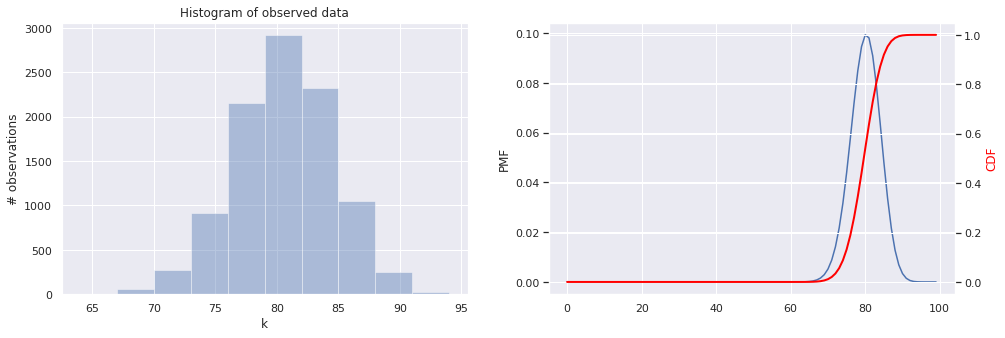

In [4]:
# two outcome of each trial, A or B
# n: total number of trials
# p: probability of one outcome
# f(k, n, p) is the probability of k times of A in n times trials
n = 100
p = 0.8
data = binom.rvs(n=n,p=p,size=10000)

fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(16, 5))
sns.distplot(data, kde=False, bins=10, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='k', ylabel='# observations');

x = range(n)
ax2.plot(x, binom.pmf(x,n=n,p=p))
ax2.set_ylabel('PMF')
ax3 = ax2.twinx()
ax3.plot(x, binom.cdf(x,n=n,p=p), 'r-', color="red", label='CDF', lw=2)
ax3.set_ylabel('CDF', color="red")
plt.show()

## Bernoulli Distribution

$$ \begin{align}
f(k; p) = p^k (1-p)^{1 - k} \text{, for k } \in [0,1]
\end{align} $$

In [5]:
# two outcomes of only one trial, 0 or 1
# p: probability of 0

bernoulli.rvs(size=10,p=0.6)

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

## Uniform  Distribution

$$ \begin{align}
f(x) = \left\{
\begin{array}{ll}
      \large \frac{1}{b-a} \small & \text{for } a \leq x \leq b\\
      0 & \text{for } x \lt a \text{ or } x \gt b \\
\end{array} 
\right. 
\end{align} $$

In [6]:
n = 10
start = 10
width = 10
data = uniform.rvs(size=n, loc=start, scale=width)
data

array([19.94733201, 11.05230996, 16.40025906, 19.0345538 , 10.88745141,
       16.55845314, 12.50835811, 14.04292262, 12.85441255, 19.81046831])

## Poisson Distribution

$$ \begin{align}
f\left( k; \lambda \right) = \frac{{e^{ - \lambda } \lambda ^k }}{{k!}}
\end{align} $$

where $\lambda$ equals to the expected value and variance

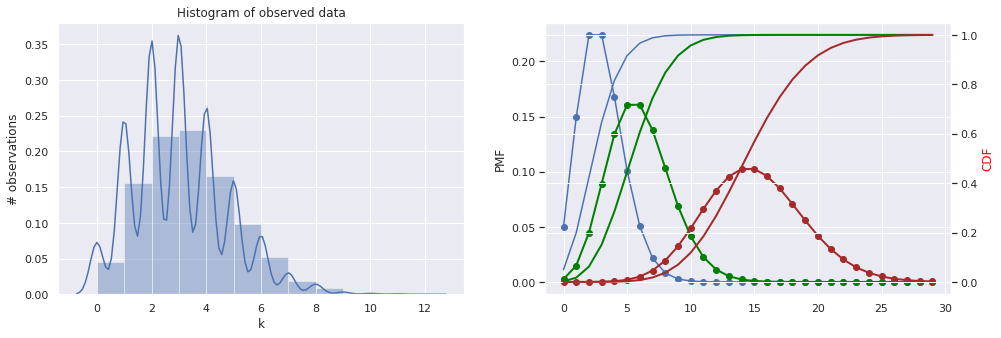

In [7]:
𝜆 = 3
data = poisson.rvs(𝜆,size=10000)

fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(16, 5))
sns.distplot(data, kde=True, bins=12, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='k', ylabel='# observations');


x = range(𝜆*10)
ax2.plot(x, poisson.pmf(x,𝜆,loc=0), 'o-')
ax2.plot(x, poisson.pmf(x,𝜆*2,loc=0), 'o-', color="green", label='𝜆*2', lw=2)
ax2.plot(x, poisson.pmf(x,𝜆*5,loc=0), 'o-', color="brown", label='𝜆*5', lw=2)
ax2.set_ylabel('PMF')
ax3 = ax2.twinx()
ax3.plot(x, poisson.cdf(x,𝜆,loc=0))
ax3.plot(x, poisson.cdf(x,𝜆*2,loc=0), color="green", label='CDF', lw=2)
ax3.plot(x, poisson.cdf(x,𝜆*5,loc=0), color="brown", label='CDF', lw=2)
ax3.set_ylabel('CDF', color="red")
plt.show()

## Beta Distribution

$$ \begin{align}
f\left( x; \alpha, \beta \right) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}
\end{align} $$


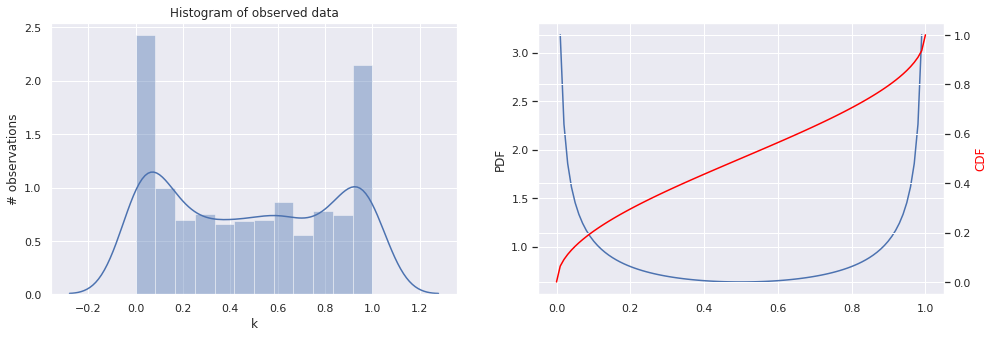

In [8]:
a = 0.5
b = 0.5
data = beta.rvs(a, b, size=1000)

fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(16, 5))
sns.distplot(data, kde=True, bins=12, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='k', ylabel='# observations');

x = np.linspace(0,1,100)
ax2.plot(x, beta.pdf(x,a,b))
ax2.set_ylabel('PDF')
ax3 = ax2.twinx()
ax3.plot(x, beta.cdf(x,a,b), color="red")
ax3.set_ylabel('CDF', color="red")
plt.show()

## Gamma Distribution

$$ \begin{align}
f\left( x; \alpha, \beta \right) = \frac{\beta^{\alpha}x^{a-1} {e^{ - \beta x } }}{\Gamma(x)}
\end{align} $$


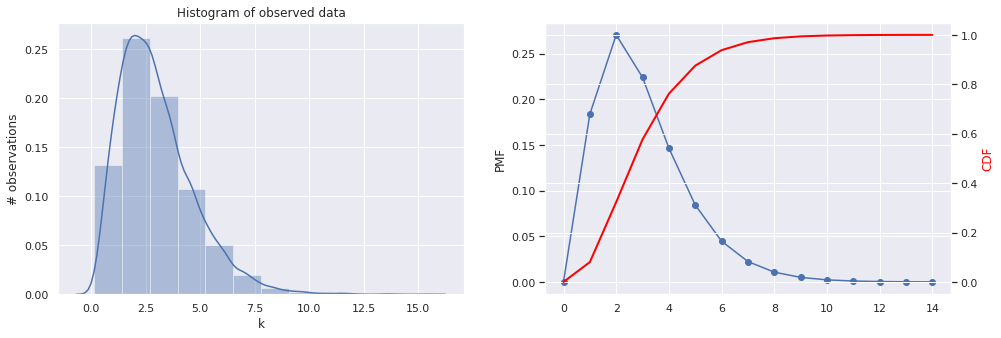

In [9]:
a = 3
data = gamma.rvs(a=a,loc=0,scale=1,size=10000)

fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(16, 5))
sns.distplot(data, kde=True, bins=12, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='k', ylabel='# observations');


x = range(a*5)
ax2.plot(x, gamma.pdf(x,a=a,loc=0), 'o-')
ax2.set_ylabel('PMF')
ax3 = ax2.twinx()
ax3.plot(x, gamma.cdf(x,a=a,loc=0), color="red", label='CDF', lw=2)
ax3.set_ylabel('CDF', color="red")
plt.show()

## Boltzmann Distribution

Boltzmann distribution is widely used in physics

$$ \begin{align}
\huge p_{i} \propto e^{-\frac{\epsilon_{i}}{k_{B}T}}
\end{align} $$
